# Training a Simple CNN on the MNIST Dataset - Handwritten Digits

1. Import Pytorch library.
2. Define Transformer.
3. Load Dataset.
4. visualization image dataset.
5. Create Data Loader to load batches of images.
6. Building our Model.
7. Training our Model.
8. Show Accuracy.
9. Plotting training log.
10. Save Model

## 1) Import Libraries

In [30]:
import numpy as np 

#import Pytroch
import torch

#use torchvision to get the dataset and useful image transformations
import torchvision
import torchvision.transforms as transforms

#import Pytorch's optimization library and nn 
#nn is used as the basic building block for Network graphs 
import torch.optim as optim
import torch.nn as nn

#check using GPU:
print("GPU available: {}".format(torch.cuda.is_available()))

GPU available: True


In [4]:
if torch.cuda.is_available():
    device = 'cuda'
    print('available')
else:
    device = 'cpu'
    print('unavailable')

available


## 2) Define Transforms 
Transforms are needed to cast the image data into the required format for input into the model.
- it's composed using the **transforms.Compose** function.
- we chain the commands or instructions for our pipeline as the arguments.
- use **transforms.ToTensor()** to convert the image data into a Pytorch Tensor.
- use **transforms.Normalize()** to normalize the pixel values.
- By passing the input as (0.5, ), (0.5, ) we normalize the image data between -1 and +1.
- Note for RGB images we use transformed.Normalized((0.5,0.5,0.5), (0.5,0.5,0.5)) instead.

**Note:** raw pixel values in our MNIST dataset range from **0** to **255**. Each image is **28 pixels** heigh and **28 pixels** wide, with a depth of **1** as it's **grayscale**.

**why Normalize?**
1. to ensue all features, or in this case, pixel intensities, are weighted equally when training CNN.
2. Makes training faster as it avoids oscilations during training.
3. Removes bias or skewness in the image data.

**Why 0.5?**

Normalization is done like this:

`image = (image - mean) / std`

Using the parameters 0.5,0.5 sets the Mean and STD to 0.5. Using the formula above this gives us:

- Min value = `(0-0.5)/0.5 = 1`
- Max value = `(1-0.5)/0.5 = -1`

For color images we use a tuple of (0.5,0.5,0.5) to set the Mean of the RGB channels to 0.5 and another tuple of (0.5, 0.5, 0.5) to set the STD to 0.5

In [5]:
# Transform to a PyTorch tensors and the normalize our valeus between -1 and +1
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, ))])
transform

Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)

## 3) Load Dataset

In [6]:
#Load Train Data
train_set = torchvision.datasets.MNIST('mnist', 
                                      train = True,
                                      download = True,
                                      transform = transform)
#Load Test Data
test_set = torchvision.datasets.MNIST('mnist',
                                     train = False,
                                     download = True,
                                     transform = transform)

In [7]:
train_set, train_set.classes

(Dataset MNIST
     Number of datapoints: 60000
     Root location: mnist
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.5,), std=(0.5,))
            ),
 ['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'])

In [8]:
test_set, test_set.classes

(Dataset MNIST
     Number of datapoints: 10000
     Root location: mnist
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.5,), std=(0.5,))
            ),
 ['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'])

### **About Training and Test Data**

There are two subsets of the data being used here:

- **Training data** Data that is used to optimize model parameters (used during training)
- **Validation data** Data that is used to evaluate the model performance 
- **Test data** Data that is used for testing the final model in order to get an unbiased estimate of *out of sample* accuracy. 

During training, we monitor model performance on the valid data.

However, MNIST doesn't have a separate test set. Therefore, we use the test set for both validation and test. 

In [9]:
print(train_set.data.shape)
print(test_set.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


**Let's look at an individual sample of data**
- (the data has not yet been normalized between -1 and 1)

In [10]:
print(train_set.data[0].shape)
print(train_set.data[0])

torch.Size([28, 28])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,  

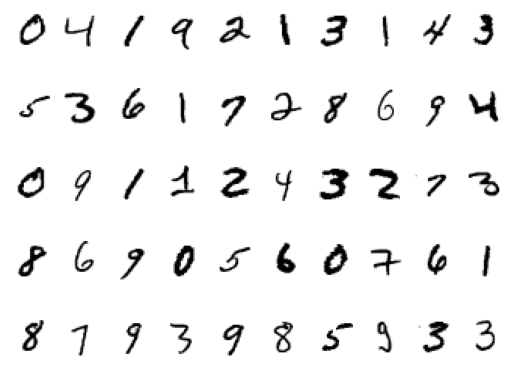

In [11]:
import matplotlib.pyplot as plt 

figure = plt.figure()
num_of_images = 50

for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index)
    plt.axis('off')
    plt.imshow(train_set.data[index], cmap='gray_r')

## 5) Create Data Loader

- a DataLoader is a function grabs the data in specified batch sizes (**128**) during training.
- setting **shuffle** equal to **True** to prevent data sequence bias. for example, in sime datasets the each class in usually in order, so to avoid loading batches of only a single class, shuffle the data.
- **num_workers** specifies how many CPU cores to utilize, setting it **0** means that it will be the main process that will do the data loading when needed. Leave it as **0** unless you wish to experiment further. 

In [14]:
#prepare train and test loader 
trainloader = torch.utils.data.DataLoader(train_set,
                                        batch_size = 128,
                                        shuffle = True,
                                        num_workers = 0)

testloader = torch.utils.data.DataLoader(test_set, 
                                        batch_size = 128, 
                                        shuffle = False,
                                        num_workers = 0)

In [20]:
trainloader.batch_size, trainloader

(128, <torch.utils.data.dataloader.DataLoader at 0x2b53e90abc8>)

In [27]:
#use the Python function iter to return an iterator for our train_loader object
dataiter = iter(trainloader)

#use next function to get the first batch of data from iterator
images, labels = next(dataiter)

print(images.shape)
print(images[0].shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([128])


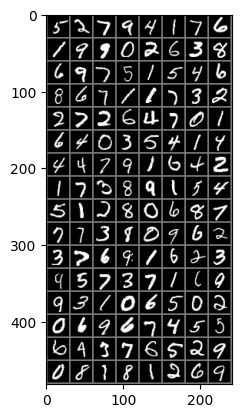

In [33]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

## 6) Build The Model
we'll use the nn.Sequential method to construct the model. Alternatively we can use functional module, however this is simpler and more similar to styles you'll work with in Keras.

### Building a Convolution Filter Layer

```
nn.Conv2d(in_channels=1,
          out_channels=32,
          kernel_size=3,
          stride=1,
          padding=1)
```

- **in_channels:** number of channels in the input image (for **grayscale** use **1** and for **RGB** use **3**)
- **out_channels:** the number of channels produced by the convolution. we use 32 channels or 32 filters. 
- **kernel_size (int or tuple)** — This is the size of the convolving kernel. We use 3 here, which gives a kernel size of 3 x 3.
- **stride (int or tuple, optional)** — Stride of the convolution. (Default: 1)
- **padding (int or tuple, optional)** — Zero-padding added to both sides of the input (Default: 0). We use a padding = 1.

#### What is torch.nn.functional?
Generally imported into the namespace F by convention, this module contains all the functions in the torch.nn library (whereas other parts of the library contain classes). As well as a wide range of loss and activation functions, you'll also find here some convenient functions for creating neural nets, such as pooling functions. (There are also functions for doing convolutions, linear layers, etc, but as we'll see, these are usually better handled using other parts of the library)

In [37]:
import torch.nn as nn
import torch.nn.functional as F

#Create the Model using a Python Class
class Net(nn.Module):
    def __init__(self):
        #super is a subclass of the nn.Module and inherits all its methods
        super(Net, self).__init__()
        
        #first layer
        self.conv1 = nn.Conv2d(1, 32, 3)
        #second layer
        self.conv2 = nn.Conv2d(32, 64, 3)
        #Max pool of 2x2 with stride 2
        self.pool = nn.MaxPool2d(2,2)
        #Fully connected layer (Linear), takes output from pooling layer (12,12,64)
        self.fc1 = nn.Linear(64 * 12* 12, 128)
        #our second Fully Connected Layer, connects the 128 nodes to 10 nodes (classes)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        #define the forward propagation sequence
        #Conv1 - Relu - Conv2 - Relu - Max Pool - Flatten - FC1 - FC2
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64* 12 * 12) #Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#Create an instance of the model and move it (memory and operations) to the CUDA device
net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [38]:
#Show the Model
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


## 7) Defining a Loss Function and Optimizer
- define what type of loss we'll be using and what method will be using to update the gradients.

1. use Cross Entropy Loss as it a multi-class problem.
2. use SGD to update weights.

In [39]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [42]:
criterion, optimizer

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.001
     maximize: False
     momentum: 0.9
     nesterov: False
     weight_decay: 0
 ))

## 8) Train The Model:
In Pytorch we use the building block functions to execute the training algorithm.

1. Get Mini-Batch Block which consists of 128 inputs (data) and their labels.
2. Initialise the Gradients with zero values.
3. Forward Propagate and get the Outputs.
4. Use Outputs to get Loss.
5. Back Propagate.
6. Update Gradients using Optimiser.

In [45]:
epochs = 10

#create some empty arrays to store logs
epoch_log = []
loss_log = []
accuracy_log = []

for epoch in range(epochs):
    print(f'Starting Epoch: {epoch+1}....')
    
    #keep adding or accumulating the loss after each mini-batch in running_loss
    running_loss = 0.0
    
    #iterate through trainloader iterator 
    #each cycle is a mini-batch
    for i, data in enumerate(trainloader, 0):
        #get the inputs --> data is a list of [inputs, labels]
        inputs, labels = data
        
        #Move data to GPU 
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        #clear gradients before training by setting to zero 
        #required for a fresh start
        optimizer.zero_grad()
        
        #Forward --> backprop + optimize
        outputs = net(inputs)  #Forward Propagation
        loss = criterion(outputs, labels) #Get Loss (quantify the difference between the results and predictions)
        loss.backward() #back propagate to obtain the new gradients for all nodes
        optimizer.step() #Update the gradient/weights
        
        #print Training statistics - Epoch/Iterations/Loss/Mini-batches
        running_loss += loss.item()
        if i % 50 == 49:  #show loss every 50 mini-batches
            correct = 0 #initialize the variable to hold the count for the correct predictions
            total = 0 #initialize the variable to hold the count of the number of labels iterated
            
            #We don't need gradients for validation, so wrap in
            #no_grad to save memory 
            with torch.no_grad():
                #iterate through the testloader iterator 
                for data in testloader:
                    images, labels = data
                    #Move to GPU 
                    images = images.to(device)
                    labels = labels.to(device)
                    
                    #Forward propagate the test data batch through the model 
                    outputs = net(images)
                    
                    #Get predictions from the maximum value of the predicted output tensor 
                    #we set dim = 1 as it specifies the number of dimensions to reduce 
                    _, predicted = torch.max(outputs.data, dim = 1)
                    #Keep adding the label size or length to the total variable 
                    total += labels.size(0)
                    #Keep a running total of the number of predictions predicted correctly 
                    correct += (predicted == labels).sum().item()
                    
                accuracy = 100 * correct / total
                epoch_num = epoch + 1
                actual_loss = running_loss / 50
                print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)}, Loss: {actual_loss:.3f}, Test_Accuracy = {accuracy:.3f}%')
                
    #Store training states after each epoch 
    epoch_log.append(epoch_num)
    loss_log.append(actual_loss)
    accuracy_log.append(accuracy)
        
print('Finished Training')

Starting Epoch: 1....
Epoch: 1, Mini-Batches Completed: 50, Loss: 2.001, Test_Accuracy = 71.310%
Epoch: 1, Mini-Batches Completed: 100, Loss: 3.331, Test_Accuracy = 82.280%
Epoch: 1, Mini-Batches Completed: 150, Loss: 4.034, Test_Accuracy = 86.520%
Epoch: 1, Mini-Batches Completed: 200, Loss: 4.538, Test_Accuracy = 88.490%
Epoch: 1, Mini-Batches Completed: 250, Loss: 4.973, Test_Accuracy = 89.590%
Epoch: 1, Mini-Batches Completed: 300, Loss: 5.378, Test_Accuracy = 90.080%
Epoch: 1, Mini-Batches Completed: 350, Loss: 5.744, Test_Accuracy = 90.560%
Epoch: 1, Mini-Batches Completed: 400, Loss: 6.080, Test_Accuracy = 90.910%
Epoch: 1, Mini-Batches Completed: 450, Loss: 6.413, Test_Accuracy = 91.310%
Starting Epoch: 2....
Epoch: 2, Mini-Batches Completed: 50, Loss: 0.314, Test_Accuracy = 91.820%
Epoch: 2, Mini-Batches Completed: 100, Loss: 0.609, Test_Accuracy = 91.880%
Epoch: 2, Mini-Batches Completed: 150, Loss: 0.897, Test_Accuracy = 92.100%
Epoch: 2, Mini-Batches Completed: 200, Loss: 1

## 9) Saving The Model:

In [47]:
PATH = './mnist_cnn_net.pth'
torch.save(net.state_dict(), PATH) #saves the model weights in a dictionary foramt 

### Let's reload the saved model

In [48]:
net = Net()
net.to(device)

net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

### Getting Predictions 
Note when working t=with tensors on the GPU, we have to convert it back to a numpy array to perform python operations on it.

In [55]:
test_iter = iter(testloader)

# We use next to get the first batch of data from our iterator
images, labels = next(test_iter)

# Move our data to GPU
images = images.to(device)
labels = labels.to(device)

outputs = net(images)

# Get the class predictions using torch.max
_, predicted = torch.max(outputs, 1)

# Print our 128 predictions
print('Predicted: ', ' '.join('%1s' % predicted[j].cpu().numpy() for j in range(128)))

Predicted:  7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 9 4 4 9 2 5 4 7 6 7 9 0 5


### Showing the test Accuracy again 

In [56]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data 
        #Move the data to GPU 
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = net(images) 
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
accuracy = 100 * correct / total 
print(f'Accuracy of the network on the 10000 test images: {accuracy:.3}%')

Accuracy of the network on the 10000 test images: 98.0%


## 10) Plotting the Training Logs 

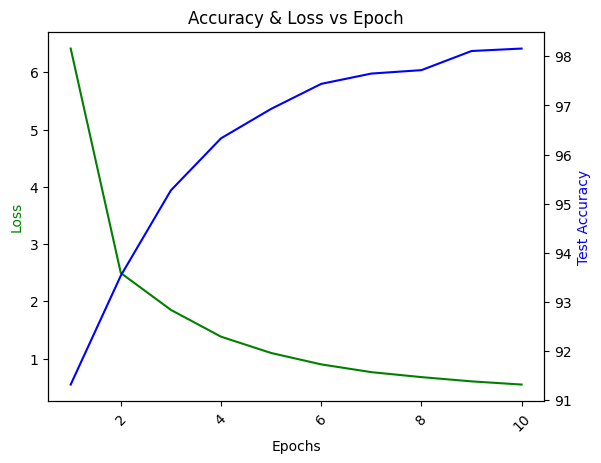

In [57]:
fig, ax1 = plt.subplots()

plt.title("Accuracy & Loss vs Epoch")
plt.xticks(rotation=45)

ax2 = ax1.twinx()

ax1.plot(epoch_log, loss_log, 'g-')
ax2.plot(epoch_log, accuracy_log, 'b-')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Test Accuracy', color='b')

plt.show()